In [17]:
import librosa
import csv
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [18]:
data_dir='./train/corner/fortyfivedeg/0303'
corner_files=glob(data_dir+'/*.wav')
data_dir2='./train/wall/mthirtydeg/0303'
wall_files=glob(data_dir2+'/*.wav')

In [19]:
y,sr=librosa.load(corner_files[0],sr=None, mono=True)
z,srz=librosa.load(wall_files[0],sr=None, mono=True)

In [20]:
def feature_calc(y,n_fft,sr):
    #root mean square energy-1
    rmse = librosa.feature.rms(y=y, frame_length=4096, hop_length=4000, center=True, pad_mode='reflect')
    rmse=rmse[0]

    #Zero crossing rate-2
    zcr = librosa.feature.zero_crossing_rate(y,frame_length=4096,hop_length=4000)
    zcr=zcr[0]

    #mfcc-3
    mfcc = librosa.feature.mfcc(y=y, sr=sr,S=None, n_mfcc=13, n_fft=4096, hop_length=4000, power=2.0)

    #spectral centroid-4
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,n_fft=4096,hop_length=4000)
    spec_cent=spec_cent[0] 

    #Spectral Roll off-5
    stft=librosa.stft(y, n_fft=n_fft, hop_length=4000)
    S, phase = librosa.magphase(stft)
    spec_rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr)

    #Onset envelope-6
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, max_size=12) 

    #Delta mfcc-7
    mfcc_delta = librosa.feature.delta(mfcc) 

    #Spectral flatness-8
    flatness=librosa.feature.spectral_flatness(y=y)

    #Chromagram-9
    chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=4000) 

    #Chroma energy normalized -10
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

    #Sumsquared window-11
    window=librosa.filters.get_window(y, Nx=n_fft)
    sumsq=librosa.filters.window_sumsquare(window,n_frames=1,hop_length=4000,n_fft=n_fft) 

    #constant Q chromogram-12
    cons_Chormagram = librosa.feature.chroma_cqt(y=y, sr=sr)

    #spectral contrast-13
    contrast=librosa.feature.spectral_contrast(S=stft,sr=sr)

    #tonal centroid-14
    harmonix = librosa.effects.harmonic(y)
    tonnetz = librosa.feature.tonnetz(y=harmonix, sr=sr)

    #mel-spectogram-15
    mel_spec=librosa.feature.melspectrogram(y=y,sr=sr,n_fft=n_fft)

    #FFT-16
    tempogram = librosa.feature.fourier_tempogram(onset_envelope=onset_env, sr=sr,hop_length=4000)
    
    return  S,rmse,zcr,mfcc,spec_cent,spec_rolloff,onset_env,mfcc_delta,flatness,chromagram,chroma_cens,sumsq,cons_Chormagram,contrast,tonnetz,mel_spec,stft,tempogram 

In [21]:
# 4x4 grid
# [rmse, zcr, mfcc, sc]
# [sro, Oe, delta, sf]
# [chromagram, chroma energy normalized, sum squared window,constant Q chromagram]
# [spectral contrast, tc, cg, sfft]
y_S,y_rmse,y_zcr,y_mfcc,y_spec_cent,y_spec_rolloff,y_onset_env,y_mfcc_delta,y_flatness,y_chromagram,y_chroma_cens,y_sumsq,y_cons_Chormagram,y_contrast,y_tonnetz,y_mel_spec,y_stft,y_tempogram=feature_calc(y,47104,sr) 
Y_features={
    'rmse':y_rmse,'zero crossing rate':y_zcr,'mfcc':y_mfcc,'spectral centroid': y_spec_cent,
    'Spectral Roll off':y_spec_rolloff,'Onset envelope':y_onset_env,'Delta mfcc':y_mfcc_delta,'Spectral flatness':y_flatness,
    'Chromagram':y_chromagram,'Chroma energy normalized':y_chroma_cens,'Sum squared window': y_sumsq,'constant Q chromogram':y_cons_Chormagram,
    'spectral contrast':y_contrast,'tonal centroid':y_tonnetz,'Mel-spectogram':y_mel_spec,'fft Tempogram':y_tempogram   
}
z_S,z_rmse,z_zcr,z_mfcc,z_spec_cent,z_spec_rolloff,z_onset_env,z_mfcc_delta,z_flatness,z_chromagram,z_chroma_cens,z_sumsq,z_cons_Chormagram,z_contrast,z_tonnetz,z_mel_spec,z_stft,z_tempogram= feature_calc(z,47104,srz)
Z_features={
    'rmse':z_rmse,'zero crossing rate':z_zcr,'mfcc':z_mfcc,'spectral centroid': z_spec_cent,
    'Spectral Roll off':z_spec_rolloff,'Onset envelope':z_onset_env,'Delta mfcc':z_mfcc_delta,'Spectral flatness':z_flatness,
    'Chromagram':z_chromagram,'Chroma energy normalized':z_chroma_cens,'Sum squared window': z_sumsq,'constant Q chromogram':z_cons_Chormagram,
    'spectral contrast':z_contrast,'tonal centroid':z_tonnetz,'Mel-spectogram':z_mel_spec,'fft Tempogram':z_tempogram   
}

In [22]:
with open('values_corner.csv', 'w') as f:
    for key in Y_features.keys():
        f.write("%s,%s\n"%(key,Y_features[key]))
with open('values_wall.csv', 'w') as f:
    for key in Z_features.keys():
        f.write("%s,%s\n"%(key,Z_features[key]))

[Text(0.5, 1.0, 'wall_Chromagram')]

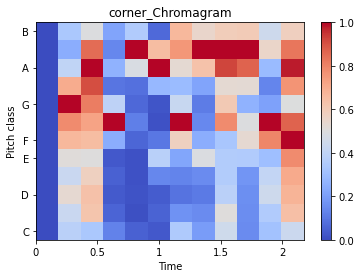

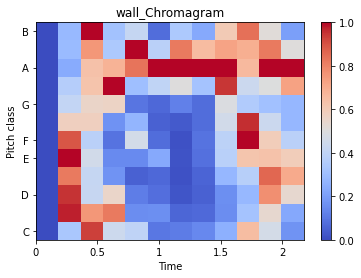

In [53]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_chromagram, x_axis='time', y_axis='chroma', hop_length=4000, cmap='coolwarm')
fig.colorbar(img, ax=ax)
ax.set(title='corner_Chromagram')
fig, ax = plt.subplots()
img2 = librosa.display.specshow(z_chromagram, x_axis='time', y_axis='chroma', hop_length=4000, cmap='coolwarm')
fig.colorbar(img2, ax=ax)
ax.set(title='wall_Chromagram')

[Text(0.5, 1.0, 'wall_cons-Q Chromagram')]

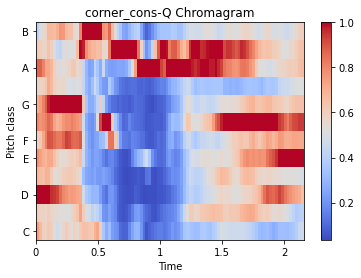

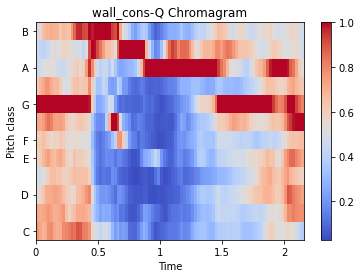

In [60]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_cons_Chormagram, y_axis='chroma', x_axis='time', ax=ax,cmap='coolwarm')
fig.colorbar(img, ax=ax)
ax.set(title='corner_cons-Q Chromagram')
fig, ax = plt.subplots()
img2 = librosa.display.specshow(z_cons_Chormagram, y_axis='chroma', x_axis='time', ax=ax,cmap='coolwarm')
fig.colorbar(img2, ax=ax)
ax.set(title='wall_cons-Q Chromagram')

[Text(0.5, 1.0, 'wall_Chroma energy normalized')]

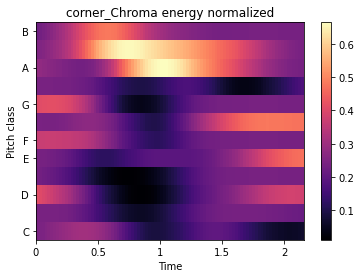

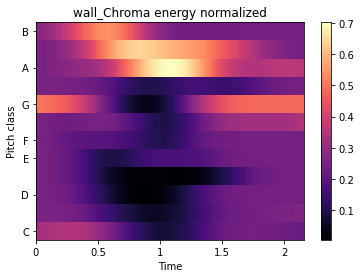

In [26]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_chroma_cens, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='corner_Chroma energy normalized')
fig, ax = plt.subplots()
img2 = librosa.display.specshow(z_chroma_cens, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img2, ax=ax)
ax.set(title='wall_Chroma energy normalized')

[Text(0.5, 1.0, 'wall_Mel-frequency spectrogram')]

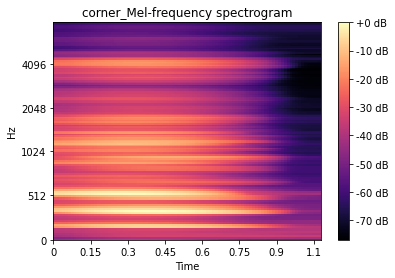

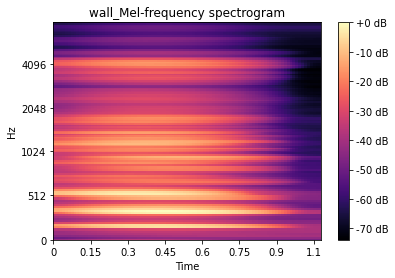

In [27]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(y_mel_spec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='corner_Mel-frequency spectrogram')
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(z_mel_spec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='wall_Mel-frequency spectrogram')

[Text(0.5, 1.0, 'wall_MFCC')]

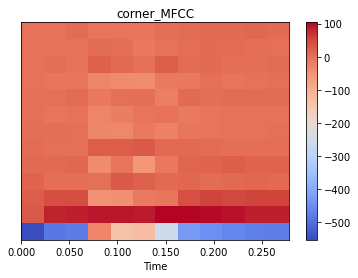

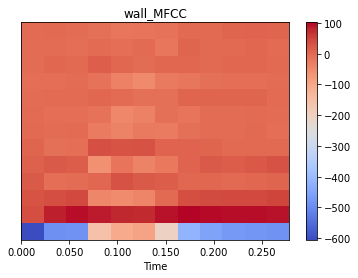

In [28]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='corner_MFCC')
fig, ax = plt.subplots()
img = librosa.display.specshow(z_mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='wall_MFCC')

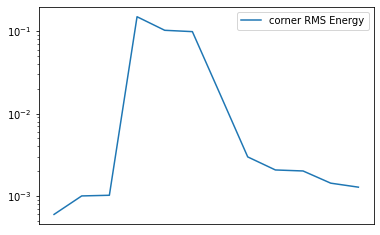

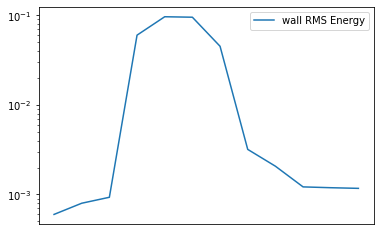

In [29]:
fig, ax = plt.subplots()
times = librosa.times_like(y_rmse)
ax.semilogy(times, y_rmse, label='corner RMS Energy')
ax.set(xticks=[])
ax.legend()
ax.label_outer()
fig, ax = plt.subplots()
times = librosa.times_like(z_rmse)
ax.semilogy(times, z_rmse, label='wall RMS Energy')
ax.set(xticks=[])
ax.legend()
ax.label_outer()

[Text(0.5, 1.0, 'wall_log Power spectrogram')]

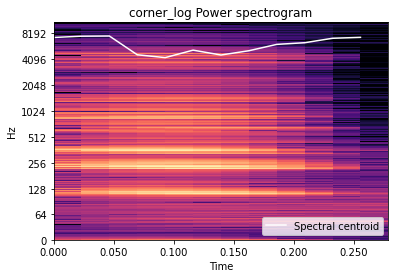

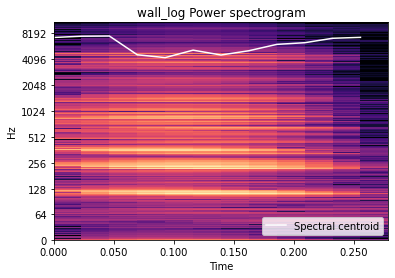

In [30]:
times = librosa.times_like(y_spec_cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(y_S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, y_spec_cent.T, label='Spectral centroid', color='w')
ax.legend(loc='lower right')
ax.set(title='corner_log Power spectrogram')
times = librosa.times_like(z_spec_cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(z_S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, y_spec_cent.T, label='Spectral centroid', color='w')
ax.legend(loc='lower right')
ax.set(title='wall_log Power spectrogram')

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'wall Spectral contrast')]

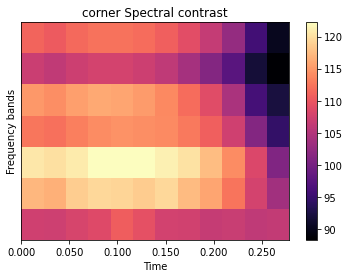

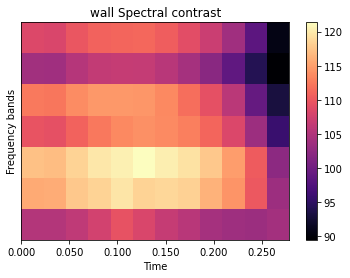

In [31]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_contrast, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(ylabel='Frequency bands', title='corner Spectral contrast')
fig, ax = plt.subplots()
img = librosa.display.specshow(z_contrast, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(ylabel='Frequency bands', title='wall Spectral contrast')

[Text(0.5, 1.0, 'wall_spectral flatness')]

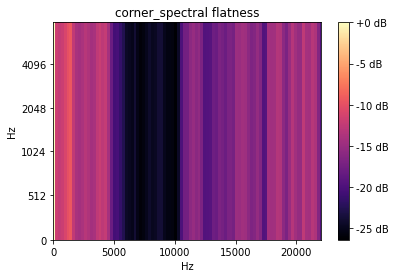

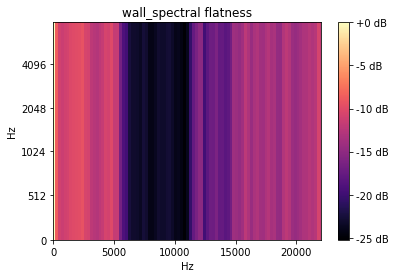

In [32]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(y_flatness, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='linear',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='corner_spectral flatness')
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(z_flatness, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='linear',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='wall_spectral flatness')

[Text(0.5, 1.0, 'wall log Power spectrogram')]

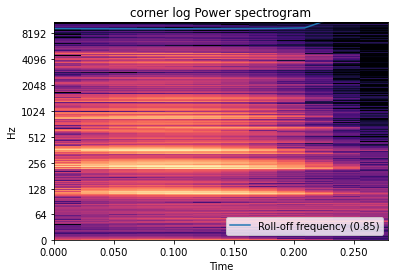

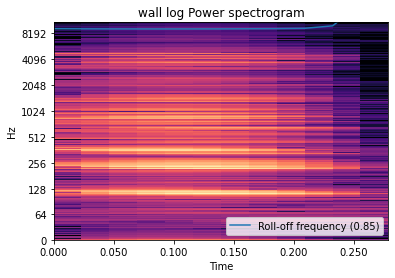

In [33]:
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(y_S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(y_spec_rolloff), y_spec_rolloff[0], label='Roll-off frequency (0.85)')
ax.legend(loc='lower right')
ax.set(title='corner log Power spectrogram')
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(z_S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(z_spec_rolloff), z_spec_rolloff[0], label='Roll-off frequency (0.85)')
ax.legend(loc='lower right')
ax.set(title='wall log Power spectrogram')

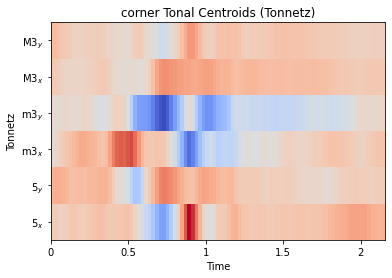

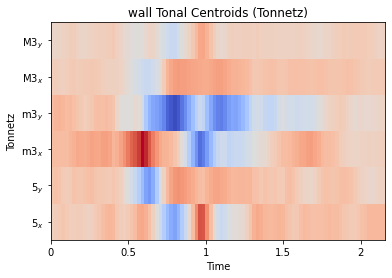

In [34]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax)
ax.set(title='corner Tonal Centroids (Tonnetz)')
ax.label_outer()
fig, ax = plt.subplots()
img = librosa.display.specshow(z_tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax)
ax.set(title='wall Tonal Centroids (Tonnetz)')
ax.label_outer()

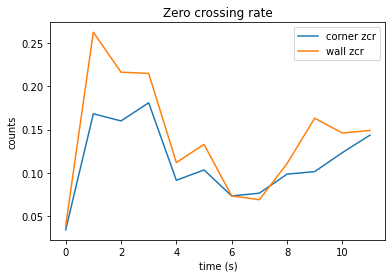

In [35]:
time=np.arange(len(y_zcr))
plt.plot(time,y_zcr)
plt.title('Zero crossing rate')
plt.xlabel('time (s)')
plt.ylabel('counts')
plt.plot(time,z_zcr)
plt.legend(['corner zcr','wall zcr'])

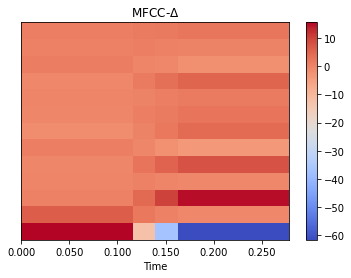

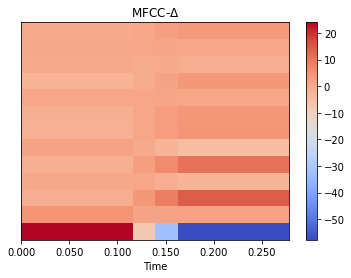

In [36]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_mfcc_delta, ax=ax, x_axis='time')
ax.set(title=r'MFCC-$\Delta$')
ax.label_outer()
fig.colorbar(img, ax=ax)
fig, ax = plt.subplots()
img = librosa.display.specshow(z_mfcc_delta, ax=ax, x_axis='time')
ax.set(title=r'MFCC-$\Delta$')
ax.label_outer()
fig.colorbar(img, ax=ax)

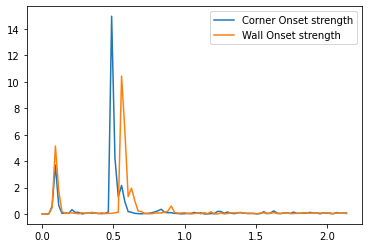

In [37]:
plt.plot(librosa.times_like(y_onset_env), y_onset_env, label='Onset strength')
plt.plot(librosa.times_like(z_onset_env), z_onset_env, label='Onset strength')
plt.legend(['Corner Onset strength','Wall Onset strength'])

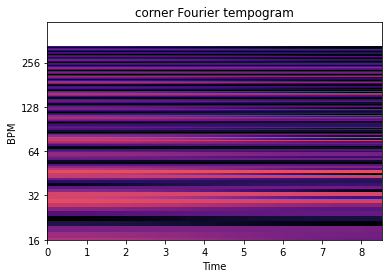

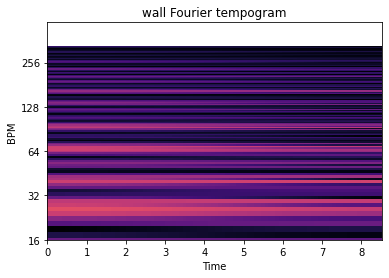

In [38]:
fig, ax = plt.subplots()
librosa.display.specshow(np.abs(y_tempogram), sr=sr, hop_length=4000,
                         x_axis='time', y_axis='fourier_tempo', cmap='magma',
                         ax=ax)
ax.set(title='corner Fourier tempogram')
ax.label_outer()
fig, ax = plt.subplots()
librosa.display.specshow(np.abs(z_tempogram), sr=sr, hop_length=4000,
                         x_axis='time', y_axis='fourier_tempo', cmap='magma',
                         ax=ax)
ax.set(title='wall Fourier tempogram')
ax.label_outer()

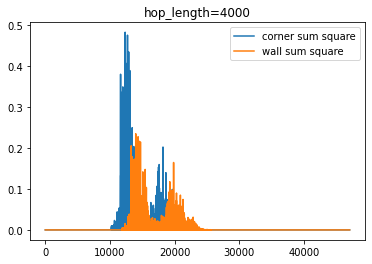

In [39]:
fig, ax = plt.subplots()
ax.plot(y_sumsq)
ax.set(title='hop_length=4000')
ax.plot(z_sumsq)
ax.legend(['corner sum square','wall sum square'])

In [44]:
y_onset_env.shape[0]

93